In [1]:
#install required libraries
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [38]:
#read data in train, test and output.
train_set = pd.read_csv("./train.csv")
train_set.head()
train_set.pop("Cabin")
train_set.pop("Fare")
train_set.pop("Name")
train_set.pop("Ticket")
print(train_set.head())


   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch Embarked
0            1         0       3    male  22.0      1      0        S
1            2         1       1  female  38.0      1      0        C
2            3         1       3  female  26.0      0      0        S
3            4         1       1  female  35.0      1      0        S
4            5         0       3    male  35.0      0      0        S


In [39]:
test_set = pd.read_csv("./test.csv")
test_set.pop("Name")
test_set.pop("Ticket")
test_set.pop("Cabin") #contains null value 

test_set.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [14]:
output_data = pd.read_csv("./gender_submission.csv")
output_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [17]:
#data cleaning and preprocessing

print("titanic_train_set.keys():\n", train_set.keys())
print("test_train_set.keys(: \n" , test_set.keys())

titanic_train_set.keys():
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
test_train_set.keys(: 
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [20]:
#check shape of data 
print("shape of titanic data: \n", train_set.shape)
print("shape of test data: \n", test_set.shape)

shape of titanic data: 
 (891, 12)
shape of test data: 
 (418, 11)


In [33]:
print(output_data.describe)

#exploring output 
print("output_data.keys(: \n" , output_data.keys())

#feature engineering
women_survived = train_set.loc[train_set.Sex == 'female']["Survived"]
percent_women = sum(women_survived)/len(women_survived)

print("percent of women survived: \n", percent_women)

men_survived = train_set.loc[train_set.Sex == 'male']["Survived"]
percent_men = sum(men_survived)/len(men_survived)

print("percent of men survived: \n", percent_men)




<bound method NDFrame.describe of      PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]>
output_data.keys(: 
 Index(['PassengerId', 'Survived'], dtype='object')
percent of women survived: 
 0.7420382165605095
percent of men survived: 
 0.18890814558058924


This shows there is approx. 74 % higher chance of women being survived than men which is just 18%, which help us consider "Sex" an important feature for determining if person with particular passenger has survived or not 

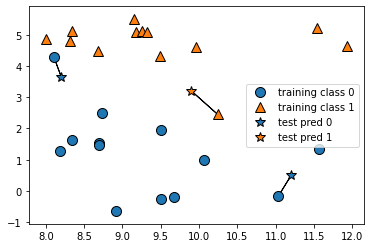

In [23]:
#start with knn 
mglearn.plots.plot_knn_classification(n_neighbors=1)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [54]:
y = train_set["Survived"]
y_test = output_data["Survived"]

#features to be considered
features = ["Pclass", "Sex", "SibSp"]
X = pd.get_dummies(train_set[features])
X_test = pd.get_dummies(test_set[features])


clf.fit(X,y)
prediction = clf.predict(X_test)
print('Predictions on test set:', prediction)

#creating output
output = pd.DataFrame({'PassengerId': test_set.PassengerId, 'Survived': prediction})
output.to_csv('submission.csv', index = False)

print("test set accuracy (R^2): {:.2f}" .format(clf.score(X_test, y_test)))
print("training set accuracy (R^2): {:.2f}" .format(clf.score(X, y)))


Predictions on test set: [0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1
 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0
 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1
 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0
 0 1 1 1 1 1 0 1 0 0 0]
test set accuracy (R^2): 0.88
training set accuracy (R^2): 0.73
